<a href="https://colab.research.google.com/github/EighteenSprings/BaiduPaperReproduction2end/blob/main/torch2paddle_%E6%95%B0%E6%8D%AE%E5%A4%84%E7%90%86%E9%83%A8%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset
import os
from PIL import Image

class FlatFolderDataset(Dataset):
    def __init__(self, content_root, style_root):
        super(FlatFolderDataset, self).__init__()
        self.content_root = content_root
        self.paths = os.listdir(self.content_root)
        self.style_root = style_root
        self.transforms = self.data_transform(128)
    
    def __getitem__(self, index):
        path = self.paths[index]
        content_img = Image.open(os.path.join(self.content_root, path)).convert('RGB')
        content_img = content_img.resize((128, 128), Image.BILINEAR)
        content_img = self.transforms(content_img)
        style_img = Image.open(self.style_root).convert('RGB')
        style_img = style_img.resize((128, 128), Image.BILINEAR)
        style_img = self.transforms(style_img)[:3,:,:]
        return content_img, style_img
    
    def data_transform(self, crop_size=128):
        transform_list = [
            transforms.RandomCrop(crop_size),
            transforms.ToTensor()
        ]
        return transforms.Compose(transform_list)
    
    def __len__(self):
        return len(self.paths)
    
    def name(self):
        return 'FlatFolderDataset'
   

In [2]:
!wget http://images.cocodataset.org/zips/test2017.zip
!unzip -l test2017.zip > info.txt

--2021-05-24 04:24:51--  http://images.cocodataset.org/zips/test2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.79.84
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.79.84|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6646970404 (6.2G) [application/zip]
Saving to: ‘test2017.zip’

test2017.zip        100%[===================>]   6.19G  16.8MB/s    in 6m 27s  

2021-05-24 04:31:19 (16.4 MB/s) - ‘test2017.zip’ saved [6646970404/6646970404]



In [4]:
!head -n 10 info.txt

Archive:  test2017.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2017-08-31 07:29   test2017/
   154360  2017-08-30 19:36   test2017/000000259564.jpg
   253711  2017-08-30 19:37   test2017/000000344475.jpg
    72735  2017-08-30 19:34   test2017/000000139491.jpg
   189766  2017-08-30 19:39   test2017/000000426648.jpg
   130857  2017-08-30 19:42   test2017/000000563577.jpg
   149615  2017-08-30 19:36   test2017/000000233616.jpg


In [5]:
!unzip test2017.zip test2017/000000259564.jpg -d ./

Archive:  test2017.zip
replace ./test2017/000000259564.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: ./test2017/000000259564.jpg  


In [6]:
from torch.utils.data import DataLoader
import numpy as np

In [17]:
dataset = FlatFolderDataset('/content/test2017/', 'style.jpg')
data_iter = DataLoader(dataset, batch_size=1, num_workers=0)
for i,item in enumerate(data_iter):
  if i>0:
    break
  content_image_t = np.array(item[0].data.cpu().numpy())
  print('content_image_t: ', content_image_t[0,0,0,:6])
  style_image_t = np.array(item[1].data.cpu().numpy())
  print('style_image_t: ', style_image_t[0,0,0,:6])

content_image_t:  [0.34509805 0.34901962 0.35686275 0.36078432 0.34901962 0.34901962]
style_image_t:  [0.8156863  0.6745098  0.22352941 0.19215687 0.27450982 0.5529412 ]


In [8]:
!pip install paddlepaddle

     |████████████████████████████████| 108.8MB 95kB/s 


In [18]:
import paddle
from paddle.vision import transforms
from paddle.io import Dataset
import os
from PIL import Image

class LapStyleDataset(Dataset):
    def __init__(self, content_root, style_root):
        super(LapStyleDataset, self)
        self.content_root = content_root
        self.paths = os.listdir(self.content_root)
        self.style_root = style_root
        self.transform = self.data_transfrom(128)
        
    def __getitem__(self, index):
        path = self.paths[index]
        content_img = Image.open(os.path.join(self.content_root, path)).convert('RGB')
        content_img = content_img.resize((128, 128), Image.BINLINEAR)
        content_img = self.transform(content_img)
        style_img = Image.open(os.path.join(self.style_root)).convert('RGB')
        style_img = style_img.resize((128, 128), Image.BINLINEAR)
        style_img = self.transfrom(style_img)[:3,:,:]
        return content_img, style_img
    
    def data_transfrom(self, crop_size=128):
        transform_list = [
            transforms.RandomCrop(crop_size),
            transforms.ToTensor()
        ]
        return transforms.Compose(transform_list)
    
    def __len__(self):
        return len(self.paths)
    
    def name(self):
        return 'LapStyleDataset'

In [19]:
dataset2 = LapStyleDataset('/content/test2017/', 'style.jpg')
data_iter2 = DataLoader(dataset, batch_size=1, num_workers=0)
for i,item in enumerate(data_iter2):
  if i>0:
    break
  content_image_t2 = np.array(item[0].data.cpu().numpy())
  print('content_image_t: ', content_image_t[0,0,0,:6])
  style_image_t2 = np.array(item[1].data.cpu().numpy())
  print('style_image_t: ', style_image_t[0,0,0,:6])

content_image_t:  [0.34509805 0.34901962 0.35686275 0.36078432 0.34901962 0.34901962]
style_image_t:  [0.8156863  0.6745098  0.22352941 0.19215687 0.27450982 0.5529412 ]


In [20]:
import numpy as np
np.testing.assert_allclose(content_image_t, content_image_t2)
print('content_image_t is equal to content_image_t2')
np.testing.assert_allclose(style_image_t, style_image_t2)
print('style_image_t is equal to style_image_t2')

content_image_t is equal to content_image_t2
style_image_t is equal to style_image_t2


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

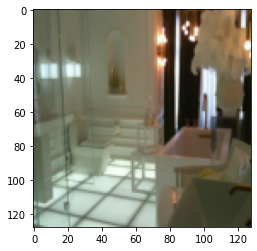

In [47]:
plt.imshow(content_image_t2.squeeze().transpose(1,2,0))

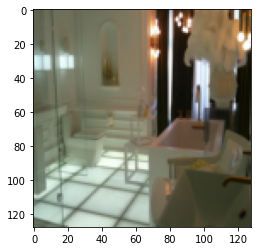

In [48]:
plt.imshow(content_image_t.squeeze().transpose(1,2,0))